<a href="https://colab.research.google.com/github/DeveCharlie/MachineLearning/blob/main/HandsOn3_Polynomial_Regression_The_Only_Introduction_You%E2%80%99ll_Need.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on 3: Polynomial Regression: The Only Introduction You’ll Need
**Alumno:** Montes Medina Carlos ALberto  
**Materia:** Inteligencia Artificial  
**Fecha:** (11/10/2025)

*Introducción*

*La regresión polinómica*

es una extensión de la regresión lineal que permite ajustar
relaciones no lineales entre variables. En lugar de usar una línea recta, utiliza
una curva polinómica que puede adaptarse mejor a datos que no siguen una tendencia lineal.

Ecuación general:

y = β₀ + β₁x + β₂x² + ... + βₙxⁿ + ε

Es útil cuando los datos tienen una forma curva y la regresión lineal simple no logra
representar correctamente la relación entre las variables. Este notebook implementa
la regresión polinómica paso a paso usando Python y scikit-learn.

### Pasos para hacer una Regresion Polinomial en Python
- Importar las librerias necesarias para el analisis
- Cargar los DataSets
- Hacer una particion en los datos (una para el entrenamiento y otra para probarlo)
- Definir el grado y usar la particion de los datos para entrenar y probar el modelo
- Evaluar el modelo polinomial con los valores:
  - Error cuadratico medio
  - R cuadradada
- Finalmente hacer una graficación para mostrar los resultados

# Preprocesamiento

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# data = pd.read_csv('china_cases.csv')
x = np.arange(1, 31)
y = np.array([
  520, 540, 580, 650, 800, 1200, 1800, 2500, 3200, 3800,
  4300, 4700, 5000, 4800, 4200, 3500, 2800, 2000, 1400, 900,
  700, 600, 580, 560, 540, 530, 520, 510, 505, 500
])

# Feature Engineering
### Hacer la particion
* Se usa la funcion train_test_split()
  - Argumentos de la funcion explicados:
  - x: son las columnas del DataSet que describen las casas (MedInc, HouseAge, AveRoom, etc...) en este caso solo se toma el ingreso Promedio "MedInc"
  - y: es el precio medio de las casas siendo el objetivo al que se quiere llegar representado en cientos de miles de dólares, e.g. un valor de 2.5 representa 250,000 dólares
  - test_size: De los registros de "MedInc" se tomara un porcentaje para hacerlo en prueba, el resto se usara para aprendeizaje. E.g un valor de 0.2 significa que el 20% de la data se usara para prueba y el 80% para aprendizaje
  - random_state: es un número semilla que funciona como divisor y es muy común para ejercicos de Machine Learnging, aparte de ser un chiste que hace referencia al libro “Guía del Autoestopista Galáctico" donde el número 42 es la respuesta al sentido de la vida

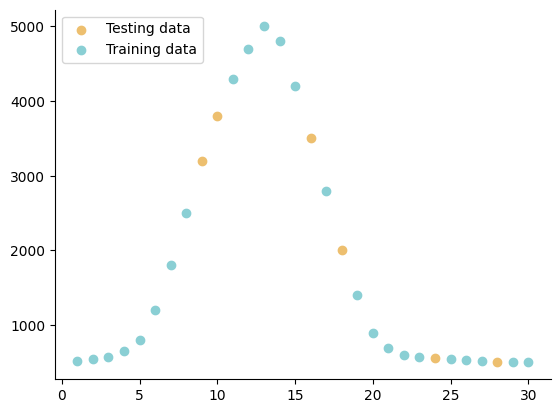

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.scatter(x_test, y_test, c='#edbf6f', label='Testing data')
plt.scatter(x_train, y_train, c='#8acfd4', label='Training data')
plt.legend(loc="upper left")
plt.show()

In [15]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [16]:
y_train = y_train[x_train[:,0].argsort()]
x_train = x_train[x_train[:, 0].argsort()]

# Modelo Selection
las funciones fit_transform() y transform() son para ajustar dependiendo del grado de la ecuación todas las combinaciones de la variable independiente.

E.g. Si la data de x tuviera dos columnas (x_1, x_2)
---

#### Grado 2 (`degree = 2`)
Incluye:
- El término constante (1)
- Las variables originales (\(x_1, x_2\))
- Los términos al cuadrado (\(x_1^2, x_2^2\))
- Los términos cruzados (\(x_1x_2\))

\[
[1, \; x_1, \; x_2, \; x_1^2, \; x_1x_2, \; x_2^2]
\]

---

En este caso solo tiene una columna (la de MedInc) entonces las combinaciones polinomicas serian
[1, x_1, x_2] (sin combinaciones)

In [17]:
poly = PolynomialFeatures(degree=2)



# Prediction and Evaluation
Para "entrenar" el modelo se resuelve un sistema matricial para calcular las betas

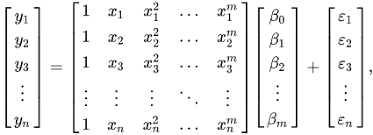

### EValuar el modelo

Después de entrenar el modelo y obtener las predicciones (`y_pred_train` y `y_pred_test`),  
se usan métricas estadísticas para medir **qué tan bien el modelo predice los valores reales**.


El valor de MSE siginifica Error promedio en el entrenamiento

El valor de R² significa qué tanto explica el modelo los datos de entrenamiento

In [18]:
x_poly = poly.fit_transform(x_train)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y_train)

LinearRegression()

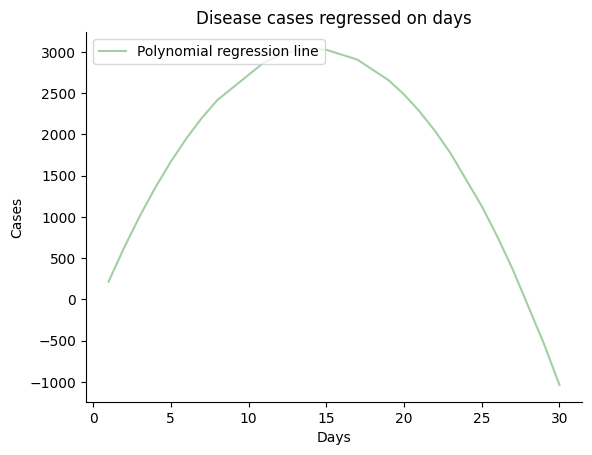

In [19]:
plt.title('Disease cases regressed on days')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.plot(x_train, poly_reg.predict(x_poly), c='#a3cfa3', label='Polynomial regression line')
plt.legend(loc="upper left")
plt.show()

In [20]:
print(poly_reg.score(x_poly, y_train))

0.5181551117812045
